<font size="5">将深度学习应用到简单的线性回归模型上时，目标是找到一条直线，以最小化预测值与真实值之间的平方误差。这时我们就可以使用梯度下降算法来更新直线的参数，以下是示例：</font>


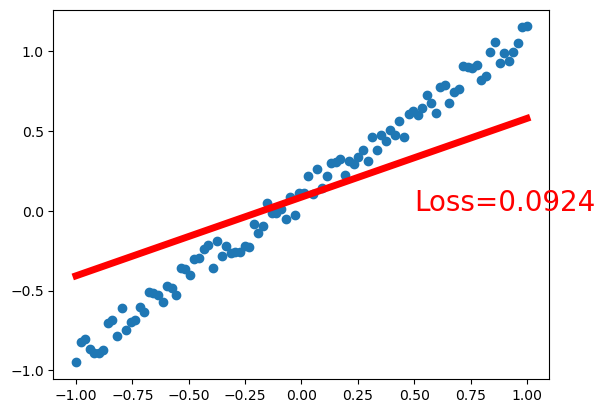

In [3]:
import torch
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  

# 生成带有噪声的目标数据 y
y = x + 0.2 * torch.rand(x.size())  

# 定义模型参数
w = torch.tensor([[0.0]], requires_grad=True)
b = torch.tensor([[0.0]], requires_grad=True)

# 定义模型
def linear_regression(x):
    return torch.matmul(x, w) + b

# 定义损失函数
def loss_fn(y_pred, y):
    return torch.mean((y_pred - y)**2)

# 定义优化器
optimizer = torch.optim.SGD([w, b], lr=0.01)

# 训练模型
for epoch in range(100):
    # 前向传播
    y_pred = linear_regression(x)
    
    # 计算损失
    loss = loss_fn(y_pred, y)
    
    # 反向传播
    loss.backward()
    
    # 更新参数
    optimizer.step()
    
    # 清零梯度
    optimizer.zero_grad()

    # 绘制训练过程中的图像
    if epoch == 99:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())  # 绘制真实数据散点图
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)  # 绘制预测曲线
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})  # 显示损失值
        plt.pause(0.1)

plt.show()

<font size="5">torch.matmul()是PyTorch中的一个函数，用于执行矩阵相乘操作。这个函数可以用来执行多种矩阵运算，包括点积、矩阵乘法、批量矩阵乘法等。</font>
<font size="5">以下是具体用法:</font>


In [2]:
import torch

# 点积
A = torch.tensor([1, 2, 3])
B = torch.tensor([4, 5, 6])
result = torch.matmul(A, B)
print(result)  # 输出 32

# 矩阵乘法
C = torch.tensor([[1, 2], [3, 4]])
D = torch.tensor([[5, 6], [7, 8]])
result = torch.matmul(C, D)
print(result)  # 输出 tensor([[19, 22], [43, 50]])

# 批量矩阵乘法
E = torch.rand(3, 2, 2)  # 一个形状为(3, 2, 2)的三维张量
F = torch.rand(3, 2, 2)
result = torch.matmul(E, F)
print(result)  # 输出一个形状为(3, 2, 2)的张量

tensor(32)
tensor([[19, 22],
        [43, 50]])
tensor([[[0.2620, 0.3295],
         [0.4288, 0.0920]],

        [[0.8200, 0.8057],
         [0.7241, 0.7199]],

        [[0.2259, 0.0941],
         [0.5286, 0.1996]]])



<font size="5">在线性回归中是找到一条符合X、y的直线，这里我们将寻找一条符合散点分布的曲线。同时，我们对torch.matmul(x, w) + b语句进行了一个封装，将w与b全部给打包隐藏，并使用torch.nn.Linear(n_feature, n_hidden)进行替换。</font>

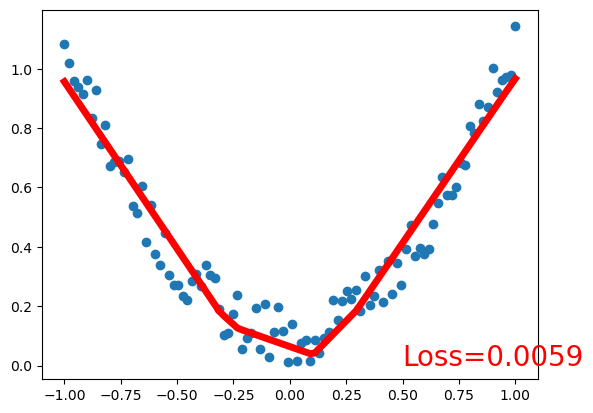

In [4]:
import torch,os
import torch.nn.functional as F
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  

y = x.pow(2) + 0.2 * torch.rand(x.size())  

# 定义神经网络模型类
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 定义隐藏层和输出层的神经元连接权重
        self.hidden  = torch.nn.Linear(n_feature, n_hidden) # 隐藏层
        self.predict = torch.nn.Linear(n_hidden, n_output)  # 输出层

    def forward(self, x):
        # 隐藏层的激活函数（使用ReLU激活函数）
        x = F.relu(self.hidden(x))      # 隐藏层的输出，应用ReLU激活函数
        x = self.predict(x)             # 输出层的线性输出
        return x

# 创建神经网络实例
net = Net(n_feature=1, n_hidden=10, n_output=1)
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # 回归问题的均方损失

# 训练网络
for t in range(200):
    # 使用神经网络进行预测
    prediction = net(x)     # 输入x并进行预测

    # 计算损失（均方误差）（1. 网络输出，2. 目标值）
    loss = loss_func(prediction, y)     

    # 清空梯度，为下一轮训练做准备
    optimizer.zero_grad()

    # 反向传播，计算梯度
    loss.backward()

    # 更新参数
    optimizer.step()

    # 绘制训练过程中的图像
    if t == 199:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())  # 绘制真实数据散点图
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)  # 绘制预测曲线
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})  # 显示损失值
        plt.pause(0.1)

plt.show()